In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.gaussian_process.kernels import (RationalQuadratic,RBF)
from sklearn.gaussian_process import GaussianProcessRegressor
data = pd.read_csv('/Users/chengnanxu/Desktop/Gaussian Process/Gaussian Process_cross validation/project_dataset.csv')

In [8]:
define = {
    '89':1,
    '90':2,
    '91':3,
    '92':4,
    '93':5,
    '94':6,
    '95':7,
    '96':8,
    '97':9,
    '98':10,
    '99':11,
    '00':12,
    '01':13,
    '02':14,
    '03':15,
    '04':16,
    '05':17,
    '06':18,
    '07':19,
    '08':20,
    '09':21,
    '10':22,
    '11':23,
    '12':24,
    '13':25,
    '14':26,
    '15':27,
    '16':28,
    '17':29,
    '18':30,
    '19':31,
}
data['year_no'] = data['Years'].apply(lambda x:str(x)[2:4])
data['year_level'] = data['year_no'].map(define)

cols = ['year_level','Month Level','Production','Consumption','Previous Month Prices','Events']

In [9]:
x_train = data.loc[0:270,cols]
y_train = data.loc[0:270,'Prices']

x_test = data.loc[271:,cols]
y_test = data.loc[271:,'Prices']

In [10]:
scaler = MinMaxScaler()
print(scaler.fit(x_train))
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

MinMaxScaler(copy=True, feature_range=(0, 1))


In [11]:
me= 2.0 * RationalQuadratic(length_scale=1.0, alpha=0.08)*(11*RBF(length_scale=1.0, length_scale_bounds=(1e-1, 10.0)))
gpr=GaussianProcessRegressor(kernel= me)
gpr.fit(x_train,y_train)
y_predict,y_std=gpr.predict(x_test, return_std=True)
print(gpr)

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
             kernel=1.41**2 * RationalQuadratic(alpha=0.08, length_scale=1) * 3.32**2 * RBF(length_scale=1),
             n_restarts_optimizer=0, normalize_y=False,
             optimizer='fmin_l_bfgs_b', random_state=None)


Text(0,0.5,'Price')

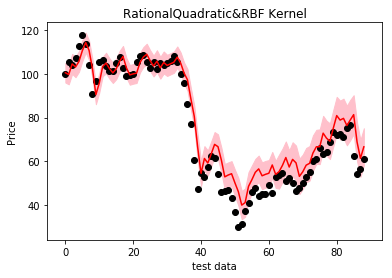

In [12]:
plt.figure()
plt.title('RationalQuadratic&RBF Kernel')
plt.fill_between(np.arange(len(x_test)), y_predict - y_std, y_predict + y_std, color='pink',
                 )
plt.plot(np.arange(len(x_test)), y_predict, color= 'red', label= 'RBF model')
plt.scatter(np.arange(len(x_test)), y_test, color= 'black', label= 'Data')
plt.xlabel('test data')
plt.ylabel('Price')

In [104]:
mse=[]
for a,b in zip(y_predict,y_test):
    print(a,b)
    mse.append(np.square(y_predict-y_test))

print('>>> The model"s mse is %5f'%(np.mean(mse)))

rmse=np.sqrt(np.mean(mse))
print('>>> The model"s rmse is %5f'%(rmse))

r2=r2_score(y_test, y_predict)
print('>>> The model"s r2 is %5f'%(r2))

100.5474363049725 99.85
99.69751280959463 105.41
104.57085107758758 104.23
103.17103540993412 107.07
105.67000414559152 112.69
110.61178913802723 117.79
114.37575028941501 113.67
110.74189923830272 104.09
102.30338029384438 90.73
90.4762903185474 96.75
95.81192463959451 105.27
103.34358150072512 106.28
104.97498752923275 103.41
102.44927512823779 101.17
100.47708035890537 101.19
102.32949562005524 105.1
105.77708108417573 107.64
108.01504731102614 102.52
102.78510377144266 98.85
99.5475674385525 99.37
100.00638625290594 99.74
100.33283747859241 105.26
105.20103943704453 108.16
107.75700662004238 108.76
109.00147548782115 105.43
106.06791146784963 102.63
103.59956396647613 105.48
105.80856591531483 102.1
102.82459535814996 104.83
105.23491450368601 104.04
103.8921901591093 104.87
104.62333618373668 105.71
105.36324702812999 108.37
107.70597290764272 105.23
104.94044644293899 100.05
100.37689633948321 95.85
97.30036804149859 86.08
88.6472720920865 76.99
80.57677521172445 60.7
66.48711389